In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from glob import glob
import io
from hmmlearn.hmm import MultinomialHMM


# Language Detection 

In [2]:
# Extracting 30 samples from lang B
letters = {"A":0, "o":1, "e":2, "t":3, "p":4, "g":5, "k":6}

def make_markov(lang):
    training_paths = glob(f'../23/symbol/language-training-{lang}-*')

    samples = []
    for path in training_paths:
        with io.open(path) as f:
            samples.append(f.read())

    # Initial distribution
    n = len(letters)
    # A o e t p g k
    T = np.zeros((n,n), dtype=np.float16)
    u = np.zeros(n, dtype=np.float16)

    for sample in samples:

        # Take first letter
        u0 = letters[sample[0]]
        u[u0] += 1

        for (prev,next) in zip(sample, sample[1:]):
            # Transition (i -> j)
            i , j = letters[prev], letters[next]
            T[i,j] += 1

    # Normalize
    u = u/u.sum()
    T = T/T.sum(axis = 1)[: , np.newaxis]

    return u, T

def get_max(test_sample):

    likelihoods = {k:0 for k in langs}

    with io.open(test_sample) as f:
        test_str = f.read()

        for lang in langs:
            likelihood = likelihoods[lang]
            transition_mat =Ts[lang]
            u = us[lang]

            # Initial Dist
            idx = letters[test_str[0]]
            likelihood += u[idx]

            # Now transition
            for (prev, next) in zip(test_str, test_str[1:]):
                i , j = letters[prev], letters[next]

                likelihood += transition_mat[i,j]

            likelihoods[lang] = likelihood

    return max(likelihoods, key = likelihoods.get)

In [3]:
langs = ['langA', 'langB', 'langC']

Ts = {lang: make_markov(lang)[1] for lang in langs}
us = {lang: make_markov(lang)[0] for lang in langs}

In [4]:
test_paths = glob('../23/symbol/language-test-*')
results = [get_max(i) for i in test_paths]

print(results)

['langB', 'langA', 'langA', 'langA', 'langA', 'langC', 'langA', 'langC', 'langC', 'langB']


# Speaker Identification

Since each speaker is interrupeted every 10th phoneme, we can use the following initialization for the transition matrix:

$$ 
M =
\begin{bmatrix}
0.9 & 0.05 & 0.05\\
0.05 & 0.0 & 0.05\\
0.05 & 0.05 & 0.9\\
\end{bmatrix}
$$


For the stating probability, we can use the following uniform initialization, as speakers are not chosen with any preference:

Starting Probabilities = [0.3, 0.3, 0.3]

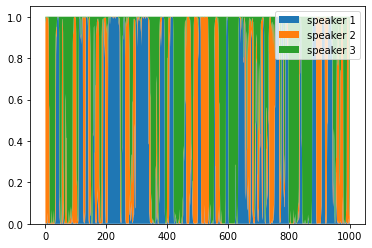

In [9]:
# From PCW24
symbols  =["A", "o", "e", "t" , "p", "g", "k"]
symbols = {k:v for k,v in zip(symbols, range(len(symbols)))}

speaker = io.open(glob('../24/speaker*')[0]).read()

tSpeaker = np.array([symbols[i] for i in speaker])
tSpeaker = tSpeaker.reshape(-1,1)

model = MultinomialHMM(n_components=3, n_iter=1000)
model.fit(tSpeaker)

pred = model.predict_proba(tSpeaker)

x = np.linspace(0, len(pred), 1000)

plt.stackplot(x, [pred[:,0], pred[:,1], pred[:,2]], labels=['speaker 1', 'speaker 2', 'speaker 3'])
plt.legend()
plt.show()